/opt/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:2641: UserWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


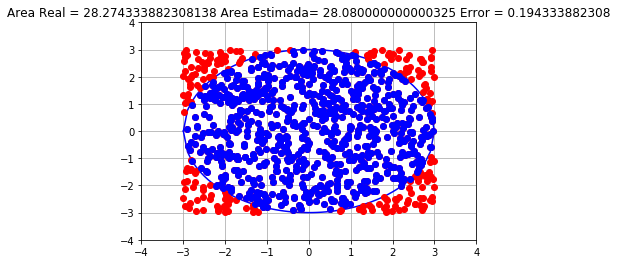

In [2]:
# -- coding: utf-8 --
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import time
%matplotlib inline  
sem = 2222
def congruencial_mixto(cantidad=10, a=6364136223846793005, c=1442695040888963407, m=((2 ** 64))):
    global sem
    numeros = []
    xo = sem
    a = a
    c = c
    m = m
    aXi = ( ((a * xo) + c) % m)
    numeros.append(aXi/m)
    sem = aXi
    con = 0
    while (con < cantidad-1):
        aXi = (((a * aXi) + c) % m)
        numeros.append(aXi/m)
        sem = aXi
        con = con + 1 
    return numeros;

def frange(start, end=None, inc=None):
    if end == None:
        end = start + 0.0
        start = 0.0
    if inc == None:
        inc = 1.0
    L = []
    while 1:
        next = start + len(L) * inc
        if inc > 0 and next >= end:
            break
        elif inc < 0 and next <= end:
            break
        L.append(next)
    return L

def pintar_circunferencia(r):
    x = frange(-r,r,0.1)
    x.append(r)
    y1=[]
    y2=[]
    for i in x:
        n = np.sqrt((r**2)-(i**2))
        y1.append(n)
        y2.append(-n)
    plt.plot(x,y1,color="blue")
    plt.plot(x,y2,color="blue")
    plt.ylim(-r-1, r+1)
    plt.xlim(-r-1, r+1)
    plt.grid(True) 
    aleatoriosx = congruencial_mixto(1000) 
    aleatoriosy = congruencial_mixto(1000) 
    puntosx =[]
    puntosy =[]
    for i in range(0,len(aleatoriosx)):
        puntosx.append(2*r*aleatoriosx[i]-r)
        puntosy.append(2*r*aleatoriosy[i]-r)
    azulesx =[]
    azulesy = []
    binario = []
    for i in range(0,len(puntosx)):
        if r**2 >= puntosx[i]**2+puntosy[i]**2:
            azulesx.append(puntosx[i])
            azulesy.append(puntosy[i])
            binario.append(1)
        else:
            binario.append(0)
            
    plt.plot(puntosx, puntosy, color="r",linewidth=0, marker='o', lw=1 )
    plt.plot(azulesx, azulesy, color="b",linewidth=0, marker='o', lw=1 )
    
    
    delta1 = (float(1)/float(len(puntosx)))*(2*r)**2
    area_aprox1 = 0
    for i in binario:
        area_aprox1 += i*delta1
    area_mat = math.pi*(r**2)
    
    titulo = "Area Real = "+str(area_mat)+\
             " Area Estimada= "+str(area_aprox1)+\
             " Error = "+str(np.abs(area_mat-area_aprox1))
    plt.title(titulo)
    plt.show()
    
r=3
pintar_circunferencia(r)